# Imports

We need a few libraries to help the development of this project.

In [221]:
import numpy as np
import pandas as pd
import math
import statistics as stats

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


# Building the dataset

Now we create a dataset with the information in the `match_data_v5.csv`, set the name of each column and drop the `matchID` and `empty` columns, since they are not relevant to the analysis.

In [72]:
data = pd.read_csv('match_data_v5.csv')
data.columns = ["matchID","blueTeamControlWardsPlaced","blueTeamWardsPlaced","blueTeamTotalKills","blueTeamDragonKills","blueTeamHeraldKills","blueTeamTowersDestroyed","blueTeamInhibitorsDestroyed","blueTeamTurretPlatesDestroyed","blueTeamFirstBlood","blueTeamMinionsKilled","blueTeamJungleMinions","blueTeamTotalGold","blueTeamXp","blueTeamTotalDamageToChamps",
                            "redTeamControlWardsPlaced","redTeamWardsPlaced","redTeamTotalKills","redTeamDragonKills","redTeamHeraldKills","redTeamTowersDestroyed","redTeamInhibitorsDestroyed","redTeamTurretPlatesDestroyed","redTeamMinionsKilled","redTeamJungleMinions","redTeamTotalGold","redTeamXp","redTeamTotalDamageToChamps","blueWin","empty"]
data = data.drop(columns=["matchID","empty"])
data.head()

,blueTeamControlWardsPlaced,blueTeamWardsPlaced,blueTeamTotalKills,blueTeamDragonKills,blueTeamHeraldKills,blueTeamTowersDestroyed,blueTeamInhibitorsDestroyed,blueTeamTurretPlatesDestroyed,blueTeamFirstBlood,blueTeamMinionsKilled,...,redTeamHeraldKills,redTeamTowersDestroyed,redTeamInhibitorsDestroyed,redTeamTurretPlatesDestroyed,redTeamMinionsKilled,redTeamJungleMinions,redTeamTotalGold,redTeamXp,redTeamTotalDamageToChamps,blueWin
0,2,23,4,2,0,0,0,7,0,388,...,0,2,0,1,400,94,29637,32613,27239,1
1,2,46,12,1,0,1,0,10,0,348,...,0,1,0,4,373,76,28970,30320,36585,0
2,2,19,13,0,0,0,0,11,0,331,...,0,2,0,3,340,84,30510,29464,42984,0
3,3,28,8,0,1,1,0,9,1,355,...,0,0,0,5,378,87,25157,31069,28229,0
4,3,30,11,1,1,1,0,7,0,370,...,0,1,0,5,382,96,26052,29475,19245,1


In [73]:
data.describe()

,blueTeamControlWardsPlaced,blueTeamWardsPlaced,blueTeamTotalKills,blueTeamDragonKills,blueTeamHeraldKills,blueTeamTowersDestroyed,blueTeamInhibitorsDestroyed,blueTeamTurretPlatesDestroyed,blueTeamFirstBlood,blueTeamMinionsKilled,...,redTeamHeraldKills,redTeamTowersDestroyed,redTeamInhibitorsDestroyed,redTeamTurretPlatesDestroyed,redTeamMinionsKilled,redTeamJungleMinions,redTeamTotalGold,redTeamXp,redTeamTotalDamageToChamps,blueWin
count,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,...,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.00000
mean,3.610815,41.362023,12.792487,0.737833,0.123591,0.654902,0.002023,8.915789,0.503860,349.240578,...,0.103117,0.955088,0.001527,3.884045,350.287554,88.547368,27788.709391,29619.035789,32156.531682,0.49453
std,2.018622,43.471913,4.910510,0.722126,0.329247,0.885749,0.054101,3.083976,0.499995,31.339593,...,0.304117,0.981776,0.044021,2.591134,31.593160,14.120346,2694.330794,1896.275564,6041.175604,0.49998
min,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,194.000000,...,0.000000,0.000000,0.000000,0.000000,188.000000,0.000000,18247.000000,17602.000000,10383.000000,0.00000
25%,2.000000,25.000000,9.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,329.000000,...,0.000000,0.000000,0.000000,2.000000,330.000000,79.000000,25910.000000,28387.000000,28024.000000,0.00000
50%,3.000000,29.000000,12.000000,1.000000,0.000000,0.000000,0.000000,9.000000,1.000000,350.000000,...,0.000000,1.000000,0.000000,4.000000,351.000000,88.000000,27629.000000,29632.000000,31938.000000,0.00000
75%,5.000000,35.000000,16.000000,1.000000,0.000000,1.000000,0.000000,11.000000,1.000000,371.000000,...,0.000000,1.000000,0.000000,5.000000,372.000000,98.000000,29514.000000,30866.000000,36029.000000,1.00000
max,37.000000,603.000000,38.000000,2.000000,2.000000,10.000000,2.000000,22.000000,1.000000,465.000000,...,1.000000,10.000000,2.000000,15.000000,464.000000,156.000000,41227.000000,36797.000000,62452.000000,1.00000


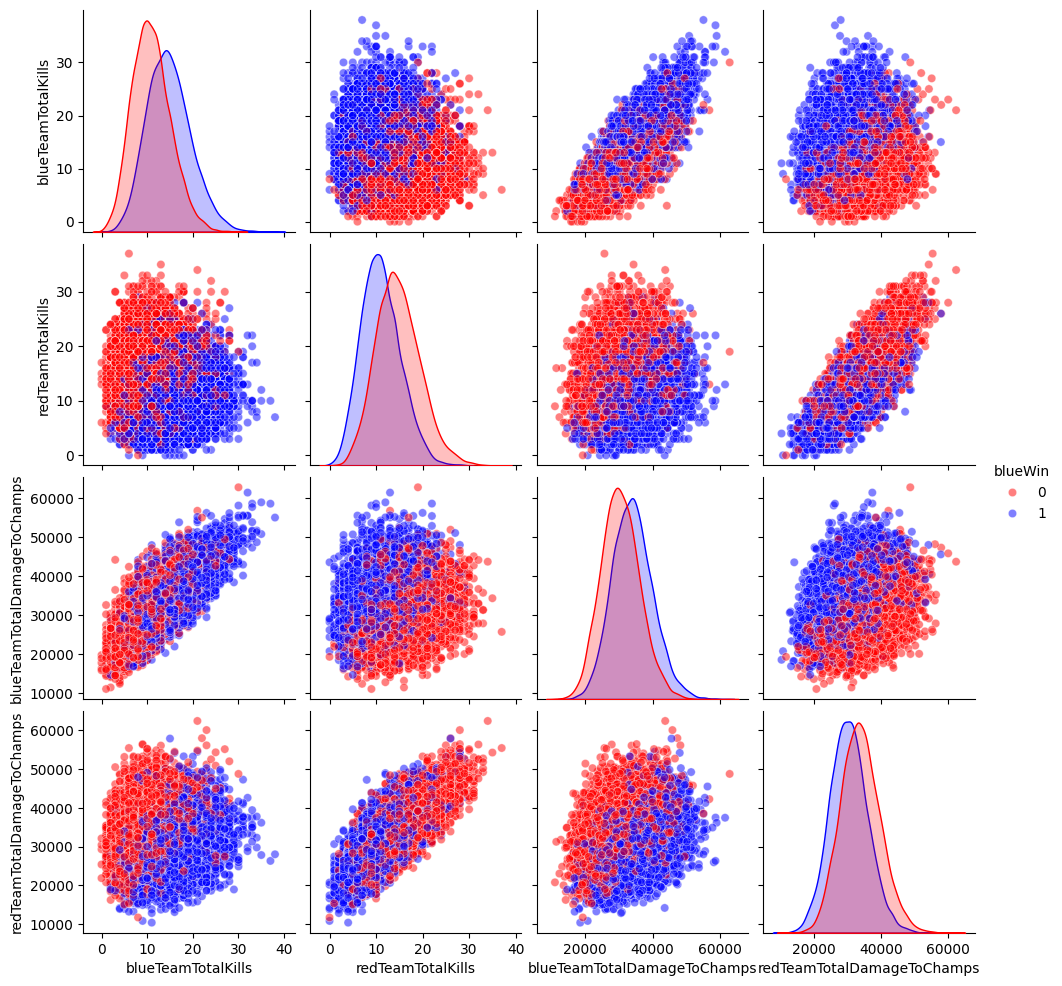

In [74]:
sample_size = data.__len__()
variables = ['blueTeamTotalKills', 'redTeamTotalKills', 'blueTeamTotalDamageToChamps', 'redTeamTotalDamageToChamps', 'blueWin']

# Sample the data
sample = data.sample(sample_size)[variables]

palette = {0: 'red', 1: 'blue'}
sb.pairplot(sample, hue='blueWin', palette=palette, plot_kws={'alpha': 0.5})

We are trying to find a correlation between game states and whether or not they lead to a victory.
In this case, `Red` means the `Blue` team lost, whereas `Blue` means the `Blue` team won.

From these graphs, we can see some contributing factors to a win:

- Total kills:
    If we compare `redTeamTotalKills` and `blueTeamTotalKills`, we can see that games are mostly won by the teams with more kills.
- Total Damage to Champions:
    Much like total kills, it appears as if the team with most total damage to champions tends to win the game.
    The graph comparing each team's total damage to champions is quite similar to the graph comparing total kills. This is because these two variables are very intertwined, since, generally, dealing damage to enemy champions may result in their death.

Now, we will create some violin plots to further analyze the data.

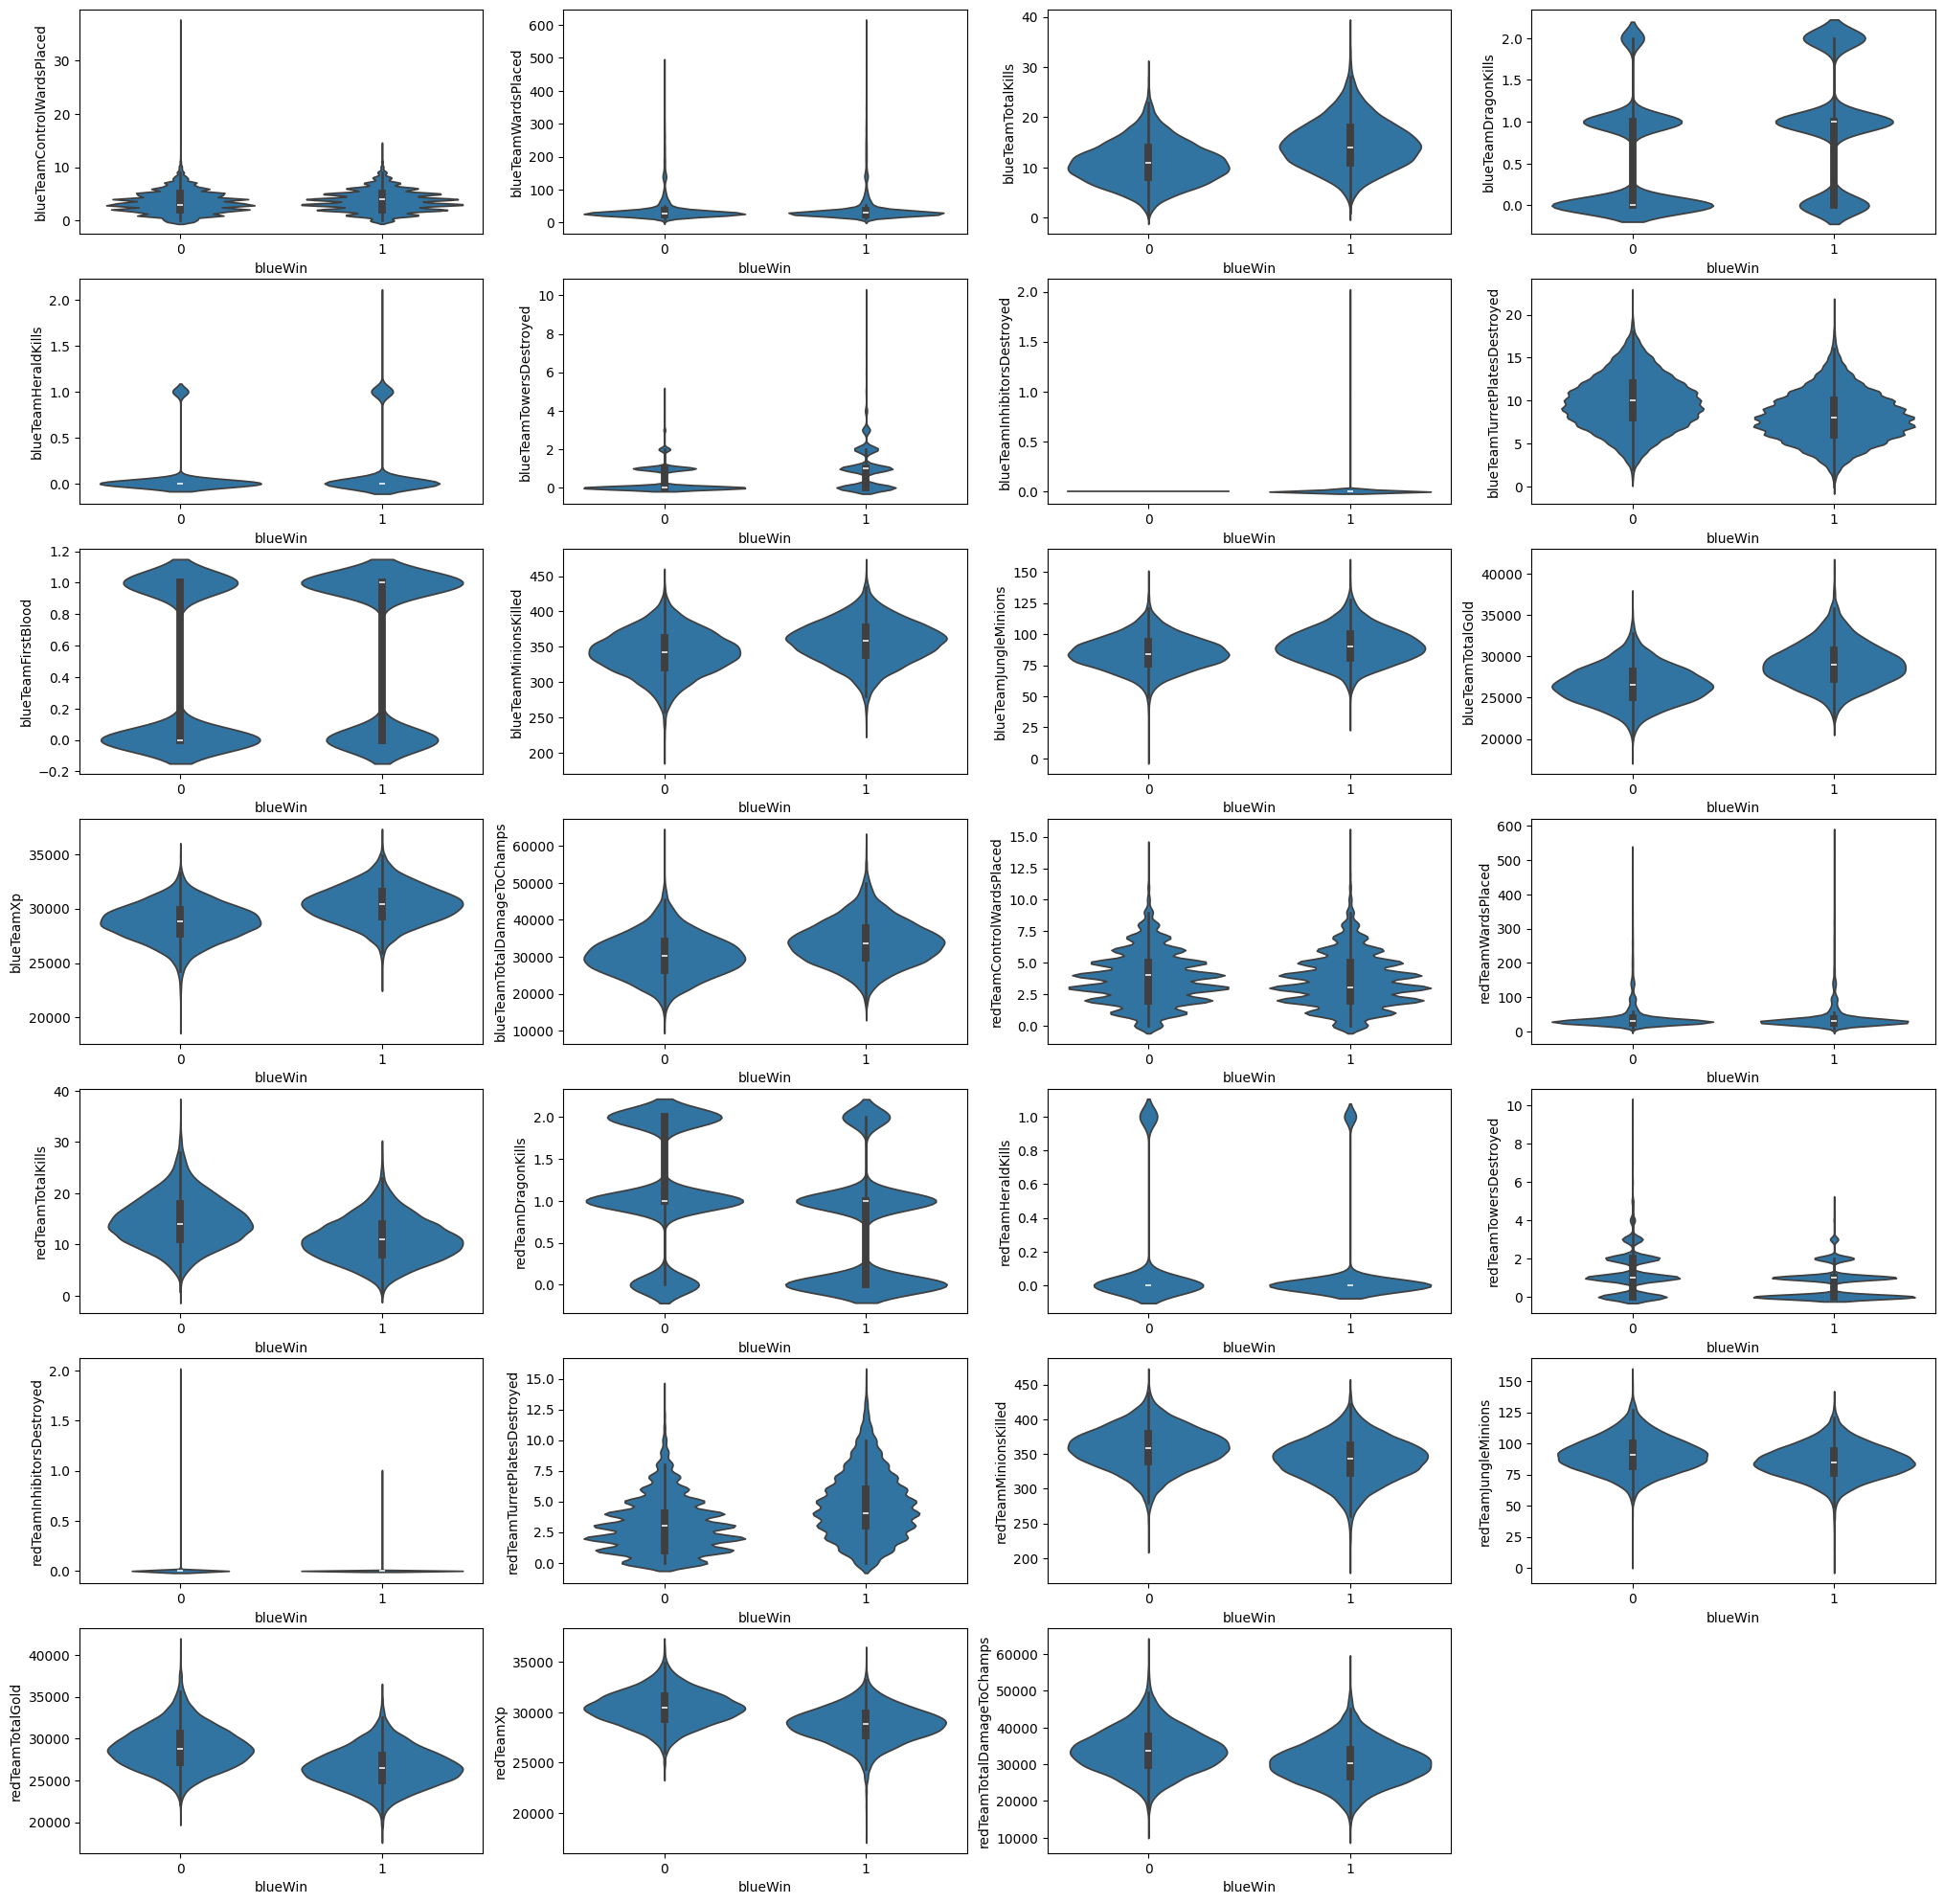

In [75]:
plt.figure(figsize=(25, 25))

num_columns = 4
num_rows = math.ceil(len(data.columns) / num_columns)

for column_index, column in enumerate(data.columns):
    if column == 'blueWin':
        continue
    plt.subplot(num_rows, num_columns, column_index + 1)
    sb.violinplot(x='blueWin', y=column, data=data)

# Classification

Now, we will start the classification process.

## Decision Tree Classifier

We are going to create a Decision Tree Classifier with the raw dataset we have, no additional performance boosters.

In [147]:
new_data = data.drop(columns=['blueWin'])
inputs = new_data.values
labels = data['blueWin'].values

(training_inputs, testing_inputs, training_labels, testing_labels) = train_test_split(inputs, labels, test_size=0.25, random_state=42) # 42 is the answer to everything

decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(training_inputs, training_labels)
decision_tree_classifier.score(testing_inputs, testing_labels)

0.668937048503612

As we can see, we got an average score of about 66-67%. This isn't great. To improve it, we will select the most prominent features, and also use ensemble methods.

### Ensemble Method

Instead of using a single decision tree, we can use an ensemble of decision trees, such as a Random Forest or Gradient Boosting classifier. These methods often perform better than a single decision tree.

In [168]:
random_forest_classifier = RandomForestClassifier(n_estimators=100)
random_forest_classifier.fit(training_inputs, training_labels)
random_forest_classifier.score(testing_inputs, testing_labels)

0.7422816575862639

As we can see, with 100 estimators, we bumped the score to around 74-75%

### Feature Selection

Not all features are equally informative. We can use feature importance methods to select the most informative features to train our model.

In [153]:
# Get the feature importances
importances = random_forest_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(training_inputs.shape[1]):
    print(f"{new_data.columns[indices[f]]}: {importances[indices[f]]}")

redTeamTotalGold: 0.11109193963172669
blueTeamTotalGold: 0.105470529561041
redTeamXp: 0.0942445140007645
blueTeamXp: 0.08636513526928523
blueTeamTotalKills: 0.056147733537895636
redTeamTotalKills: 0.05120699780262632
redTeamTotalDamageToChamps: 0.049105400667463446
blueTeamTotalDamageToChamps: 0.047746902973537016
blueTeamMinionsKilled: 0.04189777138346344
redTeamMinionsKilled: 0.039276647826493497
redTeamJungleMinions: 0.03509893530115696
blueTeamJungleMinions: 0.03478423327848837
redTeamWardsPlaced: 0.03325916506961415
blueTeamWardsPlaced: 0.03270319713053907
redTeamTurretPlatesDestroyed: 0.02713955818972339
blueTeamTurretPlatesDestroyed: 0.02623040040558806
blueTeamDragonKills: 0.026029549126061334
redTeamControlWardsPlaced: 0.02303401352417847
blueTeamControlWardsPlaced: 0.022462658956539202
redTeamDragonKills: 0.01617159837701443
blueTeamTowersDestroyed: 0.01419705869608908
redTeamTowersDestroyed: 0.012660752756574713
blueTeamFirstBlood: 0.006121540152735739
blueTeamHeraldKills: 0

Let's stop and analyze this for a bit, in the context of the actual game.

Looking at the top of the feature importances list, we can see `blueTeamTotalGold` and `redTeamTotalGold`. This makes sense, because, in `League of Legends`, you kill minions, enemy champions, neutral objetives and so on, so you can earn more gold, which in turn gives you the ability to buy more items, which make you stronger. The stronger you are compared to your opponent, the better odds you have of winning the game.

Alternatively, let's look at the bottom of the list. We'll ignore `Inhibitors Destroyed` for now.
Both `First Blood` and `Herald Kills` seem not too indicative of whether or not a team wins the game.
Let's think why.

`First Blood` corresponds to the first kill in the game. This tends to happen very early on, especially since our dataset contains games from mid `emerald` to high `diamond`, ranks very high up in the ranked ladder, also known to have very aggressive and chaotic games. `First Blood`, compared to other kills, gives a bonus 100 gold on top of the 300 gold received for killing an enemy champion. Seeing as a game spans roughly 25-40 minutes, where each player will end up having around 15000 gold (depending on the position, supports don't usually have that much gold), it makes sense that 100 gold at the beggining of the game does not impact the outcome very significantly.

`Heralds`, on the other hand, after being placed on the map, can be very helpful to destroy towers, which in turn gives the team more gold and puts more pressure on the map for the enemy team. So why is it so low? Very much like `First Blood`, the `Herald` spawns on the map very early on in the game. 
Additionally, this variable can be misleading. `Herald Kills` represents the `Herald` **Kills**, not what you actually do **with** the `Herald`. 
There is much to consider here due to several factors:

- **Killing** the `Herald` itself does not give the team much of an advantage, it's what you do **with** it
- If you do not place the `Herald` on the map 4 minutes after killing it, that ability expires and you cannot summon it anymore
- Some `Herald` summons can be very bad, and thus not really help the team that summoned it
- The `Herald` disappears from the map at 19:55 minutes into the game, if in combat. If you kill it at exactly 19:55 minutes, you have until 23:55 minutes to spawn it. Our dataset only contains information on the first 15 minutes of the game. 

With this in mind, it would make sense that these 2 factors: `First Blood` and `Herald Kills` don't tells us a lot about who is going to win the game.

In [213]:
# Add InhibitorsDestroyed since they're important but underrepresented
top_features = ['redTeamInhibitorsDestroyed'] + ['blueTeamInhibitorsDestroyed'] + [new_data.columns[indices[i]] for i in indices[:22]]
data_top_features = data[top_features]

(training_inputs, testing_inputs, training_labels, testing_labels) = train_test_split(data_top_features.values, labels, test_size=0.25, random_state=42)

fs_random_forest_classifier = RandomForestClassifier(n_estimators=100)
fs_random_forest_classifier.fit(training_inputs, training_labels)
fs_random_forest_classifier.score(testing_inputs, testing_labels)

0.7455836222552419

In [ ]:
scores = cross_val_score(random_forest_classifier, data_top_features.values, labels, cv=10)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Now, let's compare a simple Decision Tree Classifier with a Random Forest Classifier with feature selection

Average difference of scores between Random Forest and Decision Tree Classifiers:  0.0823675086676573


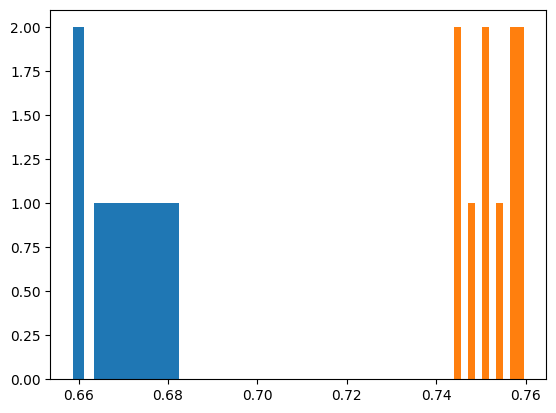

In [220]:
dtc_accuracies = []
rfc_accuracies = []

for repetition in range(20):
    # Create the training and test sets for each model
    (dtc_training_inputs,
     dtc_testing_inputs,
     dtc_training_labels,
     dtc_testing_labels) = train_test_split(inputs, labels, test_size=0.25)
    
    (rfc_training_inputs, 
     rfc_testing_inputs,
     rfc_training_labels, 
     rfc_testing_labels) = train_test_split(data_top_features.values, labels, test_size=0.25)

    # Create the classifiers
    decision_tree_classifier = DecisionTreeClassifier()
    random_forest_classifier = RandomForestClassifier(n_estimators=100)
    
    # Train the classifier on the training set
    decision_tree_classifier.fit(dtc_training_inputs, dtc_training_labels)
    random_forest_classifier.fit(rfc_training_inputs, rfc_training_labels)
    
    # Validate the classifier on the testing set using classification accuracy
    dtc_accuracy = decision_tree_classifier.score(dtc_testing_inputs, dtc_testing_labels)
    rfc_accuracy = random_forest_classifier.score(rfc_testing_inputs, rfc_testing_labels)

    dtc_accuracies.append(dtc_accuracy)
    rfc_accuracies.append(rfc_accuracy)

plt.hist(dtc_accuracies)
plt.hist(rfc_accuracies)

print("Average difference of scores between Random Forest and Decision Tree Classifiers: ", stats.mean(rfc_accuracies) - stats.mean(dtc_accuracies))

As we can see, the Random Forest Classifier with feature selection has, on average, 8% better accuracy than a simple Decision Tree Classifier, bumping up the 67% figure to around a 75%. 